In [1]:
import SiblingDir
import matplotlib.pyplot as plt
import numpy as np
import dataToVar as dat

In [2]:
# d = dat.c85_noInsert
b = dat.c50_insert
c = dat.c70_insert
a = dat.c35_insert





# end= 20000
shortest = min(len(a[1][:]),len(a[2][:]),len(b[1][:]),len(b[2][:]),len(c[2][:]),len(c[1][:]))#,len(d[1][:]),len(d[2][:]))
# shortest = min(len(c[1]),len(b[1]),len(b[2]),len(c[2]))
# print(c[1][0])

totalDat = [a,b,c]

samp = []
sampRaw = []
time = []
Ttherm = []
count = 0
for i in totalDat:
    samp.append(-i[2][:shortest]+max(i[2]))
    sampRaw.append(i[2][:shortest])
    time.append(i[0][:shortest])
    Ttherm.append(np.array(i[1][:shortest]))
    print(len(sampRaw[count]))
    count+=1

for i in Ttherm:
    for j in range(len(i)):
        if str(i[j]) == 'nan':
            i[j] = i[j-1]

8917
8917
8917


1.370910000000002 2.299999999999997 4.549999999999983
0.001444590476190468 -0.06085085714285703 1.7310666666666839


''

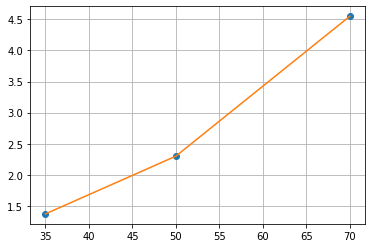

In [3]:
# offEig = 85 - np.average(d[2][-10:])
offFif = 50 - np.average(b[2][-10:])
offSev = 70 - np.average(c[2][-10:])
offThir = 35 - np.average(a[2][-10:])

xx = np.array([35,50,70])
yy = np.array([offThir,offFif,offSev])#,offEig])
print(offThir,offFif,offSev)#,offEig)

aa,bb,cc = np.polyfit(xx,yy,2)                              #offset coeffs
plt.plot(xx,yy,'o')
plt.plot(xx,aa*xx**2+bb*xx+cc)
plt.grid()
print(aa,bb,cc)

# aa = 0.0005422163719175917
# bb = 0.012185395960783472
# cc =  0.5547414622080452
;

In [4]:
def r2(y,fit):
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2
def areaFit(data,fit,end):
    
    A = 0
   
    for n in range(end): 
             
        # A += np.absolute((fit[n+4]-data[n]) + .5*(data[n]-data[n+4])*4 + .5*(data[n]-data[n+4])*4)  
        A += np.absolute(fit[n]-data[n])    
    return A



# def decay(lam):
#     return (max(totalDat[i][2])-min(totalDat[i][2]))*np.exp(-lam*time[i])

def T(lam,Tset,time):
    offset = aa*Tset**2+bb*Tset+cc
    # offset = 3
    return (92-Tset+offset)*np.exp(-lam*time)+Tset-offset
        



zlist = []
for i in sampRaw:
    for j in i:
        zlist.append(j)
zlist = np.array(zlist)
###############################################################################################################################################################################################




In [5]:
tries = np.arange(0,.01,.00001)

rr = {}
# AA = {}
for i in tries:
    zlistFit = []
    for j in range(len(sampRaw)):
        zlistFit.append(T(i,Ttherm[j],time[j]))
    
    
  
    zlistFitShape = []
    for k in zlistFit:
        for l in k:
            zlistFitShape.append(l)
    zlistFitShape = np.array(zlistFitShape)
    
    # A = 0
    
    # for m in range(len(zlistFit)):
      
    #     A += areaFit(sampRaw[m],zlistFit[m],1000)
        
    r = r2(zlist,zlistFitShape)
    
    
    if r >= .9 and r <= 1:
        rr[r] = i
    # if A > 0:
    #     AA[A] = i
print(max(rr.keys()))
print(rr[max(rr.keys())])
# print()
# print(min(AA.keys()))
# print(AA[min(AA.keys())])
    
    

0.9569085786061289
0.00945


''

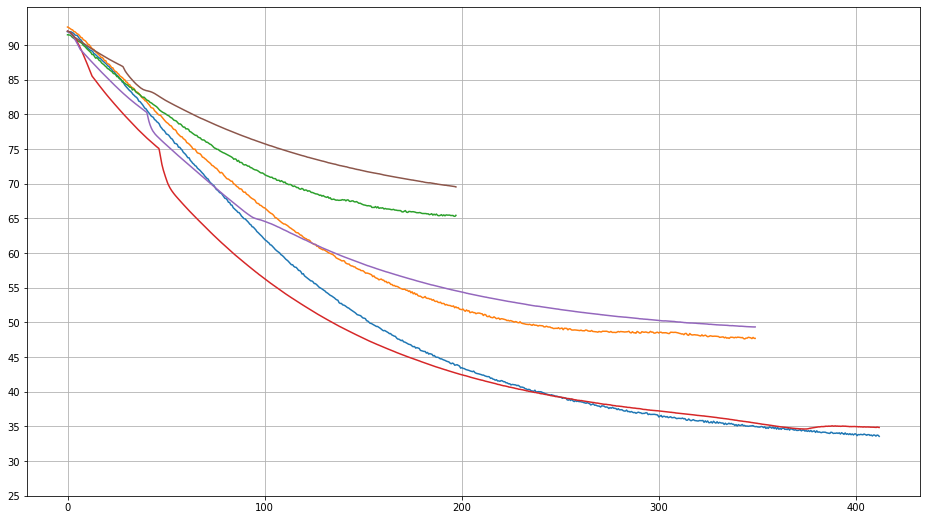

In [6]:
plt.figure(figsize=(16,9))
def lambbb(Tset):
    return 5e-6*Tset**2-.0003*Tset+.0119

    
for i in range(len(sampRaw)):
    plt.plot(time[i],sampRaw[i])
for i in range(len(totalDat)):
    plt.plot(time[i],T(rr[max(rr.keys())],Ttherm[i],time[i]))
    # plt.plot(time[i],T(lambbb(Ttherm[i]),Ttherm[i],time[i]))
    # plt.plot(time[i],T(.008,Ttherm[i],time[i]))
  
plt.grid()
plt.yticks(np.arange(25,95,5))
# plt.xticks(np.arange(0,500,50))


;

0.007525000000000001


''

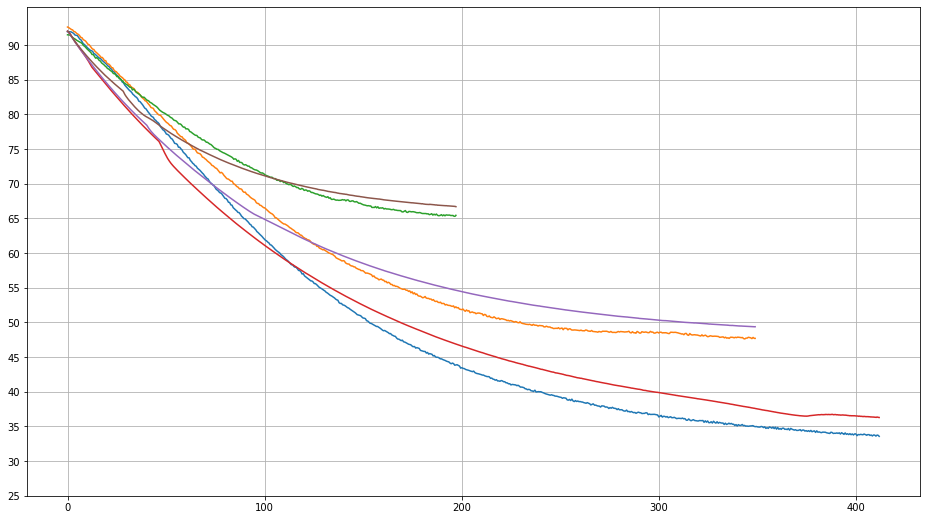

In [7]:
def lambbb(Tset):
    return 5e-6*Tset**2-.0003*Tset+.0119

plt.figure(figsize=(16,9))

for i in range(len(sampRaw)):
    plt.plot(time[i],sampRaw[i])
for i in range(len(totalDat)):
    # plt.plot(time[i],T(rr[max(rr.keys())],Ttherm[i],time[i]))
    plt.plot(time[i],T(lambbb(Ttherm[i]),Ttherm[i],time[i]))
plt.grid()
plt.yticks(np.arange(25,95,5))
# plt.xticks(np.arange(0,500,50))
print(lambbb(25))

;

''

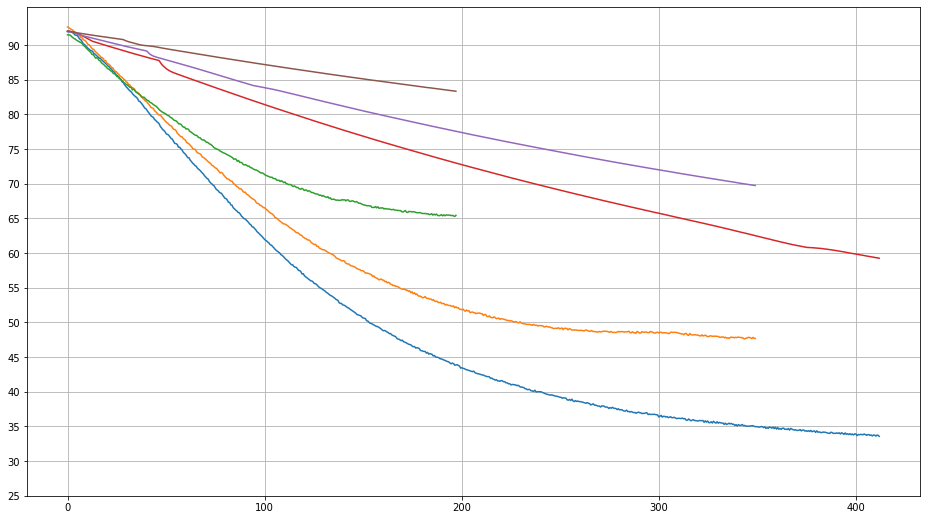

In [8]:
plt.figure(figsize=(16,9))
def lambbb(Tset):
    return 5e-6*Tset**2-.0003*Tset+.0119
for i in range(len(sampRaw)):
    plt.plot(time[i],sampRaw[i])
for i in range(len(totalDat)):
    # plt.plot(time[i],T(rr[max(rr.keys())],Ttherm[i],time[i]))
    plt.plot(time[i],T(.002,Ttherm[i],time[i]))
plt.grid()
plt.yticks(np.arange(25,95,5))
# plt.xticks(np.arange(0,500,50))
;
        

In [9]:
fullSamp = np.array(dat.full_insertC[2])#[:17000]
fullTherm = np.array(dat.full_insertC[1])#[:1700])
fullTime = np.array(dat.full_insertC[0])

def cool(A0,lam,time,Alast):
    return (A0-Alast)*np.exp(-lam*time[:9000])+Alast
plt.plot(fullSamp[17800:])
plt.plot(cool(78.5,.0075,fullTime,43))

plt.grid()
;

AttributeError: module 'dataToVar' has no attribute 'full_insertC'

In [ ]:
print(np.absolute(1))

1
